In [17]:
pip install sdv

  Using cached copulas-0.6.1-py2.py3-none-any.whl (52 kB)
  Using cached scikit_learn-1.0.2-cp38-cp38-win_amd64.whl (7.2 MB)Note: you may need to restart the kernel to use updated packages.



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\abhi\\anaconda3\\Lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [779]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from numpy import array, random, sum, unique
from pandas import DataFrame, read_csv

In [807]:
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn import metrics
import tensorflow as tf
from sklearn.manifold import TSNE

In [781]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Lambda
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop, Adadelta

In [782]:
#LSTMs
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import LSTM, GRU, Bidirectional

In [4]:
#Setting up the dataset for ML
# Text file data converted to integer data type
import numpy as np
x_data = np.loadtxt("dataset/x_dataTrain.txt", dtype=float)
print(x_data)

[[3.27030e-24 3.07616e-24 5.22539e-24 ... 1.32958e-21 1.33228e-21
  1.35562e-21]
 [1.30267e-20 1.30677e-20 1.31157e-20 ... 3.81686e-20 3.81212e-20
  3.80739e-20]
 [6.26322e-21 6.28294e-21 6.30602e-21 ... 1.83835e-20 1.83606e-20
  1.83378e-20]
 ...
 [2.18046e-21 2.18672e-21 2.19415e-21 ... 4.09628e-21 4.09113e-21
  4.08599e-21]
 [8.45625e-21 8.48075e-21 8.50976e-21 ... 1.65705e-20 1.65496e-20
  1.65289e-20]
 [9.18122e-27 9.43401e-27 1.16085e-26 ... 4.02891e-22 4.05835e-22
  4.14389e-22]]


In [8]:
#Setting up the dataset for ML
# Text file data converted to integer data type
y_data = np.loadtxt("dataset/y_dataTrain.txt", dtype=float)
print(y_data)

[[5.44779525e-02 3.63563344e-01 3.93226327e-01 ... 3.84039400e-03
  1.04632279e-03 8.05759487e-06]
 [4.16023007e-02 1.98831946e-01 3.19697149e-01 ... 1.58676888e-04
  2.70865681e-04 6.98852685e-06]
 [3.25809662e-02 3.30184164e-01 2.25277622e-01 ... 3.64259914e-04
  1.77938880e-05 5.15590766e-06]
 ...
 [6.00137545e-03 2.25446819e-01 2.36290974e-01 ... 3.41272939e-03
  1.68012889e-04 8.55777941e-06]
 [9.61424398e-03 2.41019755e-01 4.74460251e-01 ... 2.28148605e-03
  1.53862644e-04 3.59720563e-06]
 [1.48247666e-02 4.65782909e-01 3.00848722e-01 ... 5.70894991e-03
  1.74632155e-04 1.76412088e-06]]


In [783]:
features = pd.DataFrame(x_data)

In [784]:
feature_dict = {
    0 : 'H2O',
    1 : 'CO2',
    2 : 'O2',
    3 : 'N2',
    4 : 'CH4',
    5 : 'N2O',
    6 : 'CO',
    7 : 'O3',
    8 : 'SO2',
    9 : 'NH3',
    10 : 'C2H6',
    11 : 'NO2'
}

In [785]:
labels = pd.DataFrame(y_data)
labels.rename(columns=feature_dict,
          inplace=True)
labelsSum = labels[['H2O','CO2', 'O2', 'N2', 'CH4']]

labelsSum['H2O'] = labelsSum['H2O'].apply(lambda x: x*100)
labelsSum['CO2'] = labelsSum['CO2'].apply(lambda x: x*100)
labelsSum['O2'] = labelsSum['O2'].apply(lambda x: x*100)
labelsSum['N2'] = labelsSum['N2'].apply(lambda x: x*100)
labelsSum['CH4'] = labelsSum['CH4'].apply(lambda x: x*100)

labelsSum

<ipython-input-785-cb945ec1c6d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelsSum['H2O'] = labelsSum['H2O'].apply(lambda x: x*100)
<ipython-input-785-cb945ec1c6d5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelsSum['CO2'] = labelsSum['CO2'].apply(lambda x: x*100)
<ipython-input-785-cb945ec1c6d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,H2O,CO2,O2,N2,CH4
0,5.447795,36.356334,39.322633,2.347669,12.807289
1,4.160230,19.883195,31.969715,37.276586,4.568130
2,3.258097,33.018416,22.527762,36.730550,2.988821
3,4.756591,22.928300,52.232608,0.433152,14.348949
4,8.355934,19.788123,39.827563,22.288283,6.370204
...,...,...,...,...,...
9998,3.211915,34.743236,35.990073,22.761101,1.522112
9999,1.049656,18.019818,33.185333,42.389717,3.421742
10000,0.600138,22.544682,23.629097,46.500135,5.045736
10001,0.961424,24.101976,47.446025,19.817285,4.904123


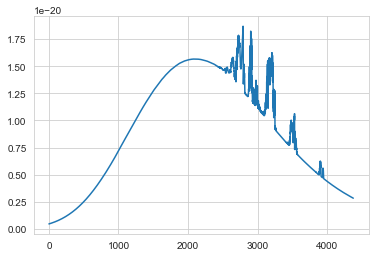

In [789]:
plt.plot(features.iloc[52,:])
plt.show()

In [797]:
#Converting columns to vectors
testFeatures = features[features.columns[::100]]
testFeatures.columns = testFeatures.columns.astype(str)
#test['combined'] = features.values.tolist()
#test['combined'] = test['combined'].to_numpy()

Index(['0', '100', '200', '300', '400', '500', '600', '700', '800', '900',
       '1000', '1100', '1200', '1300', '1400', '1500', '1600', '1700', '1800',
       '1900', '2000', '2100', '2200', '2300', '2400', '2500', '2600', '2700',
       '2800', '2900', '3000', '3100', '3200', '3300', '3400', '3500', '3600',
       '3700', '3800', '3900', '4000', '4100', '4200', '4300'],
      dtype='object')

In [798]:
testFeatures['CO2'] = labelsSum['CO2']


<ipython-input-798-d98903234857>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testFeatures['CO2'] = labelsSum['CO2']


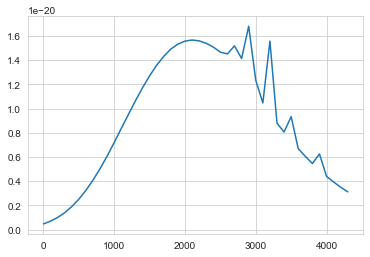

In [792]:
plt.plot(testFeatures.iloc[52,:])
plt.show()

In [205]:
#Make synthetic data
#Create synthetic data
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(testFeatures)

<ipython-input-205-320c2094b4d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testFeatures['CO2'] = labelsSum['CO2']
C:\Users\abhi\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\abhi\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\abhi\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\abhi\anaconda3\lib\site-packa

In [224]:
pickle.dump(model, open('dataGen.pkl', 'wb'))

<IPython.core.display.Javascript object>

In [206]:
sample = model.sample(num_rows=10003)
sample

C:\Users\abhi\anaconda3\lib\site-packages\sdv\tabular\base.py:250: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled = previous_rows.append(sampled, ignore_index=True)


,0,100,200,300,400,500,600,700,800,900,...,3500,3600,3700,3800,3900,4000,4100,4200,4300,CO2
0,1.280331e-23,3.351845e-23,3.878593e-23,6.208160e-23,1.323413e-22,6.202630e-23,1.424408e-22,4.392069e-22,7.838104e-22,4.648465e-22,...,2.230032e-21,2.745373e-21,2.089737e-21,2.187686e-21,3.166508e-21,2.008839e-21,1.773028e-21,1.714982e-21,1.487080e-21,28.422652
1,1.639843e-27,2.400524e-26,2.778264e-26,1.074290e-25,1.667017e-25,4.858880e-25,1.446302e-24,2.300269e-23,1.273715e-22,4.259232e-23,...,1.060548e-20,4.403261e-21,4.420276e-21,6.008014e-21,1.464120e-20,3.727693e-21,3.479833e-21,8.127537e-21,6.106898e-21,39.604915
2,2.504421e-23,4.652491e-23,6.598360e-24,8.573928e-23,1.951099e-23,4.507078e-23,5.952917e-23,1.072535e-22,1.126457e-22,6.875831e-23,...,4.719437e-22,4.123284e-22,3.896226e-22,3.893532e-22,4.175798e-22,3.729013e-22,3.376260e-22,3.128840e-22,2.655601e-22,53.776791
3,1.825815e-25,1.362723e-24,6.630477e-24,6.411387e-24,3.858683e-23,1.830944e-23,4.282930e-23,3.447307e-22,1.402433e-21,6.616231e-22,...,2.144084e-20,1.536376e-20,1.404799e-20,1.514053e-20,2.194906e-20,1.358677e-20,1.166824e-20,1.428151e-20,1.123334e-20,28.996846
4,9.656734e-23,3.961729e-22,4.529098e-22,9.460302e-22,1.234931e-21,1.081268e-21,2.459194e-21,9.109879e-21,1.698673e-20,7.903394e-21,...,6.364191e-20,3.141029e-20,2.685864e-20,3.424060e-20,8.041300e-20,2.294335e-20,1.843988e-20,3.740529e-20,2.801756e-20,30.297269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,1.354968e-22,3.504686e-22,1.750252e-21,6.469148e-22,3.758006e-21,6.051494e-22,1.501610e-21,7.866620e-21,1.379598e-20,5.275817e-21,...,1.301872e-20,1.087865e-20,9.961073e-21,1.026736e-20,1.693213e-20,7.552794e-21,6.007290e-21,9.931501e-21,7.697545e-21,36.479349
9999,3.424010e-22,9.021145e-22,1.736465e-21,1.286841e-21,4.462927e-21,1.282326e-21,2.565907e-21,9.952009e-21,1.929658e-20,1.051550e-20,...,4.050492e-20,4.680238e-20,4.344077e-20,5.036503e-20,6.663762e-20,3.765013e-20,2.981218e-20,5.382619e-20,4.103048e-20,26.895736
10000,1.883229e-22,2.814283e-22,6.976517e-22,5.209597e-22,1.799381e-21,3.922649e-22,8.534721e-22,3.361846e-21,5.643814e-21,2.546183e-21,...,6.722254e-21,6.282485e-21,5.967196e-21,6.610721e-21,7.818404e-21,4.973309e-21,4.525038e-21,6.224263e-21,5.159538e-21,28.602914
10001,6.236726e-21,8.918084e-21,3.345793e-20,1.406100e-20,6.733415e-20,9.788716e-21,1.740064e-20,4.904374e-20,6.899026e-20,3.816713e-20,...,4.810805e-20,4.872292e-20,4.941188e-20,5.222571e-20,4.661871e-20,3.482209e-20,3.151865e-20,4.746985e-20,3.660227e-20,76.427996


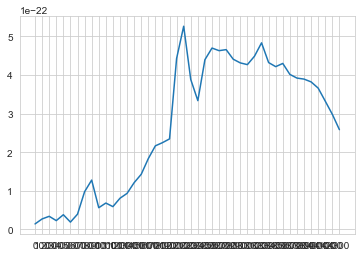

In [802]:
plt.plot(sample.iloc[52,:-1])
plt.show()

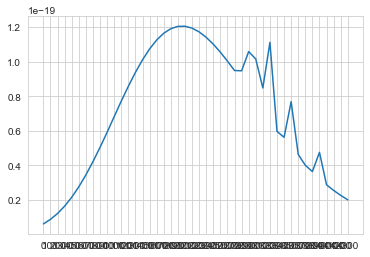

In [210]:
plt.plot(testFeatures.iloc[2,:-1])
plt.show()

array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

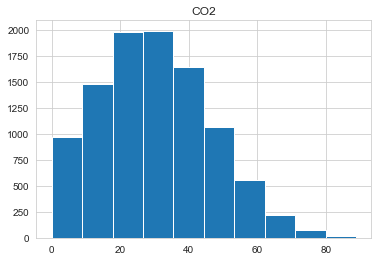

In [800]:
sample.hist(column='CO2')

array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

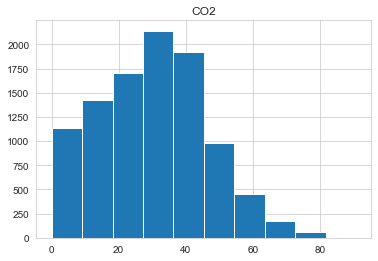

In [799]:
testFeatures.hist(column='CO2')

In [218]:
from sdv.metrics.tabular import CSTest, KSTest
KSTest.compute(testFeatures, sample)

0.8855187888078019

In [219]:
from sdv.metrics.tabular import LogisticDetection, SVCDetection
print(LogisticDetection.compute(testFeatures, sample))

1.0


In [220]:
from sdv.metrics.tabular import MLPRegressor
MLPRegressor.compute(testFeatures, sample, target='CO2')

-3.7581172181111455e-05

In [222]:
train = testFeatures.sample(int(len(testFeatures) * 0.75))
test = testFeatures[~testFeatures.index.isin(train.index)]
MLPRegressor.compute(train, test, target='CO2')

C:\Users\abhi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.07658601306774049

In [223]:
synth_xData = model.sample(num_rows=100003)
synth_xData

C:\Users\abhi\anaconda3\lib\site-packages\sdv\tabular\base.py:250: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled = previous_rows.append(sampled, ignore_index=True)


,0,100,200,300,400,500,600,700,800,900,...,3500,3600,3700,3800,3900,4000,4100,4200,4300,CO2
0,3.234447e-23,9.344309e-23,2.039141e-23,4.374577e-22,2.525142e-22,8.389659e-22,1.136206e-21,3.007250e-21,6.260953e-21,4.128431e-21,...,5.289213e-20,3.519313e-20,3.901144e-20,4.421039e-20,7.069930e-20,3.084653e-20,2.907623e-20,4.641658e-20,3.647877e-20,3.829950
1,5.398366e-24,2.578276e-23,9.944777e-23,1.843354e-23,9.192171e-23,1.418472e-23,3.756762e-23,1.622753e-22,3.250662e-22,9.406020e-23,...,5.834063e-22,5.854095e-22,6.258613e-22,6.417266e-22,5.673957e-22,5.316761e-22,5.464606e-22,5.051136e-22,4.353710e-22,29.395608
2,7.368103e-21,1.160734e-20,3.241290e-20,2.085529e-20,7.228997e-20,1.535410e-20,2.806817e-20,9.153608e-20,1.400514e-19,6.919630e-20,...,1.183181e-19,1.171662e-19,1.202267e-19,1.363276e-19,1.758309e-19,8.870787e-20,7.606130e-20,1.435135e-19,1.084588e-19,24.336615
3,6.392227e-23,1.533849e-22,1.047939e-21,3.170580e-22,2.200146e-21,7.003060e-22,1.635432e-21,5.109056e-21,9.210809e-21,6.047983e-21,...,2.752921e-20,2.159511e-20,1.885313e-20,2.259516e-20,3.492449e-20,1.439645e-20,1.313097e-20,2.399826e-20,1.819526e-20,64.743890
4,4.609674e-22,8.494359e-22,2.260218e-21,1.244703e-21,4.515076e-21,1.194311e-21,2.195928e-21,5.716450e-21,9.777372e-21,5.797275e-21,...,3.989319e-20,2.071411e-20,1.845195e-20,2.010754e-20,5.284257e-20,1.702168e-20,1.390239e-20,2.230916e-20,1.655362e-20,11.066575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99998,7.173333e-23,1.791590e-22,1.094644e-21,1.227039e-22,1.356700e-21,1.023370e-22,2.883756e-22,7.337528e-22,1.414170e-21,1.124751e-21,...,6.757854e-22,1.702608e-21,2.170170e-21,1.866976e-21,6.766148e-22,1.360240e-21,1.644230e-21,1.390310e-21,1.227877e-21,27.159556
99999,2.070971e-25,9.106323e-25,4.664272e-25,9.612130e-25,8.232354e-25,8.944150e-25,1.537117e-24,4.982829e-24,1.123794e-23,7.987409e-24,...,4.289519e-22,3.868217e-22,3.774067e-22,3.729556e-22,3.787024e-22,3.576375e-22,3.250068e-22,2.917156e-22,2.530957e-22,45.172894
100000,2.134450e-21,2.096087e-21,4.271091e-21,3.446715e-21,1.208735e-20,2.720232e-21,4.369081e-21,1.197169e-20,1.451711e-20,7.218019e-21,...,1.738414e-20,1.630408e-20,1.433612e-20,1.788842e-20,3.245529e-20,1.158407e-20,9.376690e-21,2.136091e-20,1.557630e-20,60.482909
100001,5.135071e-25,1.253387e-24,3.180921e-24,5.595554e-24,1.236004e-23,1.169745e-23,2.174969e-23,5.304666e-23,1.042680e-22,5.899857e-23,...,2.013862e-21,7.800075e-22,7.219789e-22,8.984704e-22,2.303254e-21,6.962000e-22,6.403339e-22,1.253225e-21,8.893744e-22,47.939317


In [716]:
X_features = synth_xData.iloc[:,:-2]
y_label =  synth_xData.iloc[:,-2:-1]

In [717]:
y_label

,CO2
0,3.829950
1,29.395608
2,24.336615
3,64.743890
4,11.066575
...,...
99998,27.159556
99999,45.172894
100000,60.482909
100001,47.939317


array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

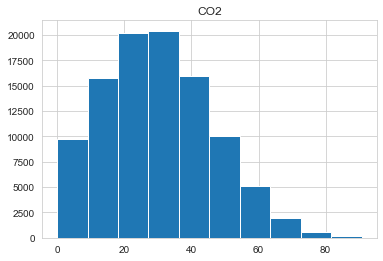

In [711]:
synth_xData.hist(column='CO2')

In [634]:
cols = ['CO2'] # one or more

Q1 = synth_xData[cols].quantile(0.25)
Q3 = synth_xData[cols].quantile(0.75)

df = synth_xData[((synth_xData[cols] < (Q1)) | (synth_xData[cols] > (Q3))).any(axis=1)]

array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

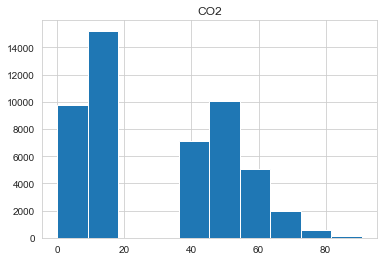

In [635]:
df.hist(column='CO2')

In [636]:
X_features = df.iloc[:,:-2]
y_label =  df.iloc[:,-2:-1]

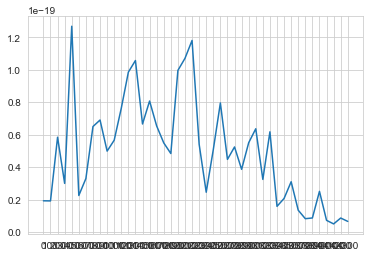

In [661]:
plt.plot(X_features.iloc[1000,:])
plt.show()

In [662]:
y_label

,CO2
0,3.829950
3,64.743890
4,11.066575
7,69.942815
8,11.357628
...,...
99995,41.012537
99999,45.172894
100000,60.482909
100001,47.939317


In [732]:
#Splitting dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.20, random_state=42)

In [733]:
X_scaledTrain = X_train
X_scaledTest = X_test
y_scaledTrain = y_train
y_scaledTest = y_test

In [734]:
scaler = StandardScaler()
X_scaledTrain = scaler.fit_transform(X_train)
X_scaledTest = scaler.fit_transform(X_test)

In [735]:
y_scaler = StandardScaler()
y_scaledTrain = y_scaler.fit_transform(y_train)
y_scaledTest = y_scaler.fit_transform(y_test)

In [736]:
#Baseline model
from sklearn.linear_model import LinearRegression
# define model
model = LinearRegression()
# fit model
model.fit(X_scaledTrain, y_scaledTrain)

LinearRegression()

In [737]:
#Calculating MAE for linear regression
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_scaledTest)
mean_absolute_error(y_scaledTest, y_pred)

0.8086829601696729

In [738]:
testY = pd.DataFrame(y_scaledTest)

C:\Users\abhi\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

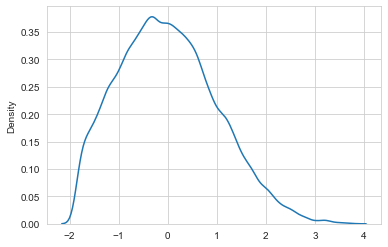

In [740]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(testY[0]), bw=0.1)

In [741]:
y_pred = pd.DataFrame(y_pred)

C:\Users\abhi\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

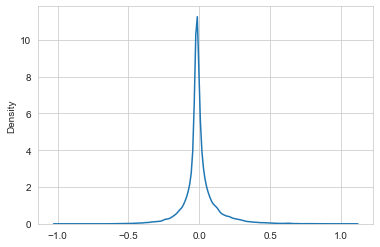

In [743]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred[0]), bw=0.1)

In [673]:
testY

,0
0,0.980034
1,-0.743460
2,-0.944084
3,0.720651
4,-0.928360
...,...
9996,-0.784241
9997,-0.849394
9998,0.935536
9999,-1.051315


In [674]:
y_pred

,0
0,-0.025008
1,0.106247
2,-0.037714
3,-0.010212
4,0.081618
...,...
9996,-0.010924
9997,-0.031224
9998,0.069438
9999,-0.017858


In [744]:
X_scaledTrain = np.squeeze(X_scaledTrain)
X_scaledTest = np.squeeze(X_scaledTest)

In [745]:
X_scaledTrain = np.expand_dims(X_scaledTrain,2)
X_scaledTest = np.expand_dims(X_scaledTest,2)

In [746]:
X_scaledTrain.shape

(80002, 44, 1)

In [678]:
(X_scaledTrain.shape[1], 1)

(44, 1)

In [747]:
from tensorflow.keras import backend as K

In [755]:
def network():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='tanh', input_shape=(X_scaledTrain.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', kernel_regularizer=regularizers.l1(reg)))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))


    model.add(Conv1D(filters=256, kernel_size=2, activation='relu', kernel_regularizer=regularizers.l1(reg)))
    model.add(MaxPooling1D(pool_size=2,padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))


    model.add(Conv1D(filters=512, kernel_size=2, activation='relu', kernel_regularizer=regularizers.l1(reg)))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(BatchNormalization())    
    
    model.add(Conv1D(filters=256, kernel_size=2, activation='relu', kernel_regularizer=regularizers.l1(reg)))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(BatchNormalization())

    #FC1   
    model.add(Flatten())
    
    model.add(Dense(256, activation='relu', kernel_regularizer = regularizers.l2(reg)))
    model.add(Lambda(lambda x: K.dropout(x,level=0.05)))
    
    model.add(Dense(y_scaledTrain.shape[-1], activation='softsign'))

    return model

In [853]:
testModel = Sequential()
testModel.add(Conv1D(filters=64, kernel_size=2, activation='tanh', input_shape=(X_scaledTrain.shape[1], 1)))
testModel.add(MaxPooling1D(pool_size=2, padding='same'))
    
testModel.add(Conv1D(filters=128, kernel_size=2, activation='relu', kernel_regularizer=regularizers.l1(reg)))
testModel.add(MaxPooling1D(pool_size=2, padding='same'))
testModel.add(BatchNormalization())
testModel.add(Dropout(0.25))


testModel.add(Conv1D(filters=256, kernel_size=2, activation='relu', kernel_regularizer=regularizers.l1(reg)))
testModel.add(MaxPooling1D(pool_size=2,padding='same'))
testModel.add(BatchNormalization())
testModel.add(Dropout(0.25))


testModel.add(Conv1D(filters=512, kernel_size=2, activation='relu', kernel_regularizer=regularizers.l1(reg)))
testModel.add(MaxPooling1D(pool_size=2, padding='same'))
testModel.add(BatchNormalization())    
    
testModel.add(Conv1D(filters=256, kernel_size=2, activation='relu', kernel_regularizer=regularizers.l1(reg)))
testModel.add(MaxPooling1D(pool_size=2, padding='same'))
testModel.add(BatchNormalization())

    #FC1   
testModel.add(Flatten())
    
testModel.add(Dense(256, activation='relu', kernel_regularizer = regularizers.l2(reg)))
    
testModel.add(Dense(y_scaledTrain.shape[-1], activation='softsign'))

In [322]:
def network():
    model = Sequential()
    model.add(LSTM(64,return_sequences=False, input_shape=(X_scaledTrain.shape[1], 1)))
    model.add(Dropout(0.5))
    model.add(LSTM(20,return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='rmsprop')
    return model

In [301]:
tau = 10000
lengthscale = .01
reg = lengthscale**2 * (1 - 0.05) / (2. * 100000 * tau)

In [144]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [324]:
def network():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='tanh', input_shape=(X_scaledTrain.shape[1], X_scaledTrain.shape[-1])))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    
    model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer = regularizers.l2(reg)))
    model.add(Lambda(lambda x: K.dropout(x,level=0.05)))
    model.add(Dense(y_scaledTrain.shape[-1], activation='relu'))

    return model

In [93]:
#Creating Neural Network model
def network():
    exoAtmos = Sequential()

    exoAtmos.add(Dense(8, kernel_initializer='normal', activation='relu'))
    exoAtmos.add(BatchNormalization())
    exoAtmos.add(Dropout(0.05))
    
    exoAtmos.add(Dense(8, kernel_initializer='normal', activation='relu'))
    exoAtmos.add(BatchNormalization())
    exoAtmos.add(Dropout(0.05))


    # The Output Layer :
    exoAtmos.add(Dense(1))

    opt = tf.keras.optimizers.SGD(learning_rate=1)
    # Compile the network :
    exoAtmos.compile(loss='mae', optimizer=opt)
    
    return exoAtmos

In [756]:
cnn = network()
sgd = tensorflow.keras.optimizers.SGD(lr=0.001)
cnn.compile(loss='mean_squared_error',optimizer='sgd')

In [850]:
pip install sklearn.externals

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.externals
ERROR: No matching distribution found for sklearn.externals


In [854]:
with open('model_pkl', 'wb') as files:
    pickle.dump(testModel, files)

<IPython.core.display.Javascript object>

AttributeError: Can't pickle local object 'Layer.add_loss.<locals>._tag_callable'

In [829]:
import graphviz
import pydot

In [840]:
from tensorflow.keras.utils import plot_model
plot_model(cnn, to_file='model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [757]:
history = cnn.fit(X_scaledTrain, y_scaledTrain,
                          batch_size = 128,
                          epochs=10,
                          verbose=1)

Epoch 1/10
626/626 [==============================] - 58s 88ms/step - loss: 1.1023
Epoch 2/10
626/626 [==============================] - 57s 91ms/step - loss: 1.0346
Epoch 3/10
626/626 [==============================] - 56s 90ms/step - loss: 1.0217
Epoch 4/10
626/626 [==============================] - 57s 92ms/step - loss: 1.0215
Epoch 5/10
626/626 [==============================] - 57s 90ms/step - loss: 1.0043
Epoch 6/10
626/626 [==============================] - 57s 91ms/step - loss: 1.0145
Epoch 7/10
626/626 [==============================] - 57s 91ms/step - loss: 1.0027
Epoch 8/10
626/626 [==============================] - 56s 89ms/step - loss: 1.0096
Epoch 9/10
626/626 [==============================] - 57s 91ms/step - loss: 1.0051
Epoch 10/10
626/626 [==============================] - 58s 93ms/step - loss: 0.9998


In [758]:
cnn.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_112 (Conv1D)          (None, 43, 64)            192       
_________________________________________________________________
max_pooling1d_104 (MaxPoolin (None, 22, 64)            0         
_________________________________________________________________
conv1d_113 (Conv1D)          (None, 21, 128)           16512     
_________________________________________________________________
max_pooling1d_105 (MaxPoolin (None, 11, 128)           0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 11, 128)           512       
_________________________________________________________________
dropout_51 (Dropout)         (None, 11, 128)           0         
_________________________________________________________________
conv1d_114 (Conv1D)          (None, 10, 256)         

In [759]:
#Evaluating the model
mae = cnn.evaluate(X_scaledTest, y_scaledTest, verbose=0)
print('>%.3f' % mae)

>1.014


dict_keys(['loss'])


KeyError: 'val_loss'

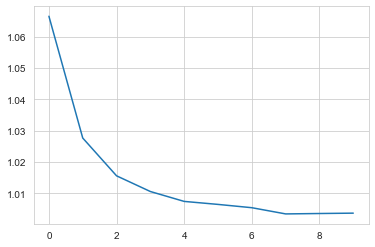

In [760]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [761]:
exoPredict = cnn.predict(X_scaledTest)
#exoPredict = y_scaler.inverse_transform(exoPredict)
#y_scaledTest = y_scaler.inverse_transform(y_scaledTest)

In [762]:
exoPred_df = pd.DataFrame(exoPredict, columns = [0])
ypred_df = pd.DataFrame(y_scaledTest, columns = [0])

C:\Users\abhi\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

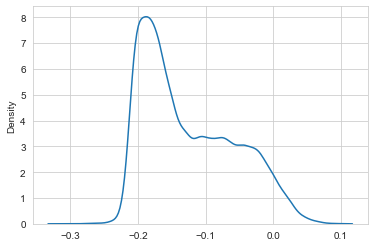

In [763]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(exoPred_df[0]), bw=0.1)

C:\Users\abhi\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

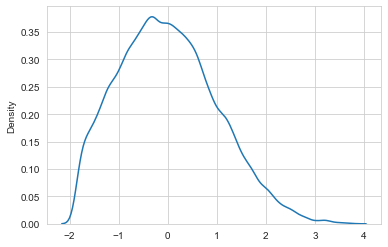

In [764]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(ypred_df[0]), bw=0.1)

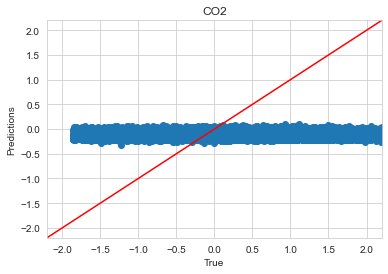

In [765]:
yyy = [-20,20] # This is just defining y = x
plt.title('CO2')
plt.ylabel('Predictions')
plt.xlabel('True')
plt.xlim([-2.2,2.2])
plt.ylim([-2.2,2.2])
plt.scatter(ypred_df.iloc[:,:],exoPred_df.iloc[:,:])
plt.plot(yyy,yyy,'r')

In [767]:
testFeatures

,0,100,200,300,400,500,600,700,800,900,...,3500,3600,3700,3800,3900,4000,4100,4200,4300,CO2
0,3.270300e-24,2.797980e-23,5.788000e-23,4.152850e-23,6.428990e-23,6.925630e-23,1.641320e-22,4.511330e-22,1.007220e-21,6.963450e-22,...,3.130560e-21,2.913060e-21,2.663360e-21,2.502410e-21,2.393560e-21,2.121450e-21,1.888420e-21,1.644270e-21,1.438280e-21,36.356334
1,1.302670e-20,1.851370e-20,2.557760e-20,3.438380e-20,4.503860e-20,5.756180e-20,7.187130e-20,8.777570e-20,1.049030e-19,1.230050e-19,...,1.026340e-19,9.251980e-20,8.331830e-20,7.480780e-20,6.725440e-20,5.976220e-20,5.319970e-20,4.724270e-20,4.185580e-20,19.883195
2,6.263220e-21,8.902270e-21,1.230020e-20,1.653650e-20,2.166280e-20,2.768860e-20,3.457460e-20,4.222890e-20,5.047290e-20,5.919030e-20,...,7.685140e-20,4.637270e-20,4.012720e-20,3.648990e-20,4.757080e-20,2.885350e-20,2.562270e-20,2.275380e-20,2.015930e-20,33.018416
3,1.304900e-22,1.211800e-21,2.724130e-21,2.126440e-21,3.585310e-21,4.210770e-21,1.051910e-20,2.842650e-20,6.245780e-20,4.252430e-20,...,1.577820e-19,1.451620e-19,1.324000e-19,1.240660e-19,1.183000e-19,1.047000e-19,9.301080e-20,8.082490e-20,7.057140e-20,22.928300
4,1.306080e-23,1.098660e-22,2.236460e-22,1.580330e-22,2.411370e-22,2.562230e-22,5.993740e-22,1.627210e-21,3.590830e-21,2.454990e-21,...,9.528960e-21,8.854150e-21,8.081850e-21,7.578690e-21,7.232840e-21,6.403730e-21,5.691880e-21,4.948660e-21,4.323090e-21,19.788123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,1.265260e-25,7.181660e-25,1.288790e-24,3.850990e-24,5.100750e-24,1.392340e-23,1.967200e-23,6.624040e-23,2.000040e-22,1.834480e-22,...,1.091270e-20,3.566290e-21,3.330540e-21,3.235400e-21,4.180540e-21,3.031140e-21,2.682230e-21,2.344640e-21,2.020180e-21,34.743236
9999,7.476030e-23,6.237630e-22,1.259950e-21,8.837990e-22,1.339180e-21,1.413580e-21,3.286060e-21,8.868260e-21,1.946030e-20,1.323400e-20,...,6.284650e-20,4.930320e-20,4.053810e-20,4.116620e-20,4.633390e-20,3.314400e-20,2.846350e-20,2.485570e-20,2.167810e-20,18.019818
10000,2.180460e-21,3.016750e-21,4.062940e-21,5.331340e-21,6.825140e-21,8.535340e-21,1.043980e-20,1.250340e-20,1.467030e-20,1.690270e-20,...,1.123200e-20,1.011710e-20,9.084100e-21,8.132810e-21,7.260940e-21,6.464500e-21,5.741490e-21,5.087660e-21,4.498460e-21,22.544682
10001,8.456250e-21,1.172940e-20,1.583550e-20,2.082690e-20,2.672060e-20,3.348530e-20,4.103700e-20,4.924010e-20,5.787470e-20,6.679270e-20,...,4.715680e-20,4.090920e-20,3.669250e-20,3.285890e-20,2.978800e-20,2.613140e-20,2.321340e-20,2.057410e-20,1.819490e-20,24.101976


In [769]:
x_final = testFeatures.iloc[:,:-1]
y_final = testFeatures.iloc[:,-1:]

In [772]:
x_scaled = scaler.transform(x_final)
y_scaled = y_scaler.transform(y_final)

In [774]:
x_scaled = np.expand_dims(x_scaled,2)

In [775]:
y_predict = cnn.predict(x_scaled)

In [777]:
exoPred_df = pd.DataFrame(y_predict, columns = [0])
ypred_df = pd.DataFrame(y_scaled, columns = [0])

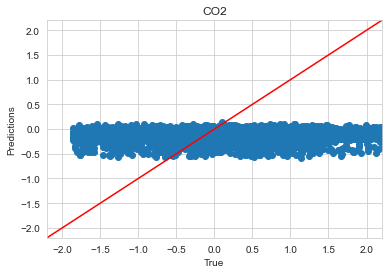

In [778]:
yyy = [-20,20] # This is just defining y = x
plt.title('CO2')
plt.ylabel('Predictions')
plt.xlabel('True')
plt.xlim([-2.2,2.2])
plt.ylim([-2.2,2.2])
plt.scatter(ypred_df.iloc[:,:],exoPred_df.iloc[:,:])
plt.plot(yyy,yyy,'r')

In [ ]:
#GMM Modelling to add ranges

In [701]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full')
gmm.fit(df)
labels = gmm.predict(df)

In [702]:
df['cluster'] = labels

<ipython-input-702-155048fe00fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = labels


In [703]:
summary = df.groupby(['cluster']).mean().reset_index().sort_values(by='CO2',ascending=False)

In [704]:
summary

,cluster,0,100,200,300,400,500,600,700,800,...,3500,3600,3700,3800,3900,4000,4100,4200,4300,CO2
2,2,2.023206e-21,2.512024e-21,8.355780e-21,3.659486e-21,1.673239e-20,2.915355e-21,4.900624e-21,1.285171e-20,1.864552e-20,...,2.672641e-20,2.046823e-20,1.923029e-20,2.168602e-20,3.388706e-20,1.502495e-20,1.286769e-20,2.254106e-20,1.725936e-20,62.577221
0,0,2.029345e-21,2.521789e-21,8.381618e-21,3.660581e-21,1.675506e-20,2.912323e-21,4.898911e-21,1.279665e-20,1.852922e-20,...,2.621676e-20,2.022446e-20,1.902625e-20,2.147379e-20,3.339600e-20,1.487402e-20,1.272203e-20,2.230963e-20,1.709417e-20,46.883741
3,3,2.085716e-21,2.582880e-21,8.641456e-21,3.736768e-21,1.720218e-20,2.943064e-21,4.949748e-21,1.298901e-20,1.877641e-20,...,2.514434e-20,1.981749e-20,1.866706e-20,2.103209e-20,3.251731e-20,1.456732e-20,1.244218e-20,2.184561e-20,1.672939e-20,16.214671
1,1,1.999427e-21,2.475130e-21,8.285795e-21,3.571236e-21,1.648958e-20,2.814749e-21,4.729399e-21,1.240633e-20,1.795770e-20,...,2.422216e-20,1.914029e-20,1.812362e-20,2.039923e-20,3.129451e-20,1.413298e-20,1.210331e-20,2.124853e-20,1.627319e-20,8.245392


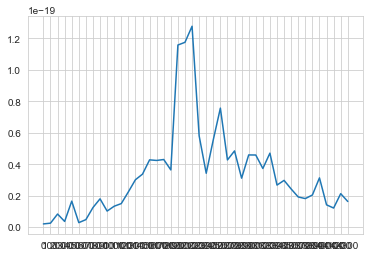

In [707]:
plt.plot(summary.iloc[3,1:-1])
plt.show()